In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Numerical Analysis

## Problem Description 

In this project, I would like to explore numerical methods for solving PDE models encountered in the physical world. In this sememster, I am also enrolled in APMA 4200 in which I learned the basic forms of "solvable" PDE's including Heat Equation and Wave Equation. I will apply the methods learned in this class for solving ODE's and attempt to solve the PDE's. My codes will discretize the PDE's and implement numerical methods to obtain solutions, which will be compared against the analytical solutions of the same equations, given the same initial and boundary conditions.

An example of each class of PDE (Heat Equation, Wave Equation) will be provided and solved analytically. Each equation will have homogeneous Dirichlet boundary conditions ($u(0,t) = u(L,t) = 0$) and a "nice" initial condition for $u(x,0) = f(x)$. I will then plot the analytical solutions which will be compared against my numerical results in the end. My questions in the project will include: 

1) How accurate are the solutions? Is the method stable?

2) How does it differ from ODE solvers introduced in class?

As an applied mathematics student, successful integration of numerical methods and PDE demonstrates my understanding of the two major fields of study. This is also relevant to contributing my mathematical knowledge into the world of science and engineering. 

## Computational  Methods 

We will use finite difference for numerical PDE solving. 
We demonstrate the derivation of this method using heat equation. 
However, the deriation and numerical formulas are same in nature for all equations we use here.

Let us consider the heat equation in one dimension, 
$$
u_t = ku_{xx}. 
$$ 
Boundary conditions and an initial condition will be applied later. The starting point is figuring out how to approximate the derivatives in this equation. <br>
Recall that the partial derivative, $u_t$, is defined by
$$
\frac{\partial u}{\partial t} = \lim_{\Delta t \to \infty} \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t}. 
$$
Therefore, we can use the approximation
$$
\frac{\partial u}{\partial x} \approx 
\frac{u(x, t + \Delta t) - u(x, t)}{\Delta t}. 
$$
This is called a forward difference approximation. 
<br>
In order to find an approximation to the second derivative, $u_{xx}$, we start with the forward difference 
$$
\frac{\partial u}{\partial x} \approx 
\frac{u(x + \Delta x, t) - u(x, t)}{\Delta x}. 
$$
Then, 
$$
\frac{\partial u_x}{\partial x} \approx 
\frac{u_x(x + \Delta x, t) - u_x(x, t)}{\Delta x}. 
$$
We need to approximate the terms in the numerator. It is customary to use a backward  difference approximation. This is given by letting ∆x → −∆x in the forward difference form, 
$$
\frac{\partial u}{\partial x} \approx 
\frac{u(x, t) - u(x - \Delta x, t)}{\Delta t}. 
$$
Applying this to $u_x$ evaluated at $x = x$ and $x = x + \Delta x$, we have
$$
u_x(x, t) \approx 
\frac{u(x, t) - u(x - \Delta x, t)}{\Delta x}. 
$$
and 
$$
u_x(x + \Delta t, t) \approx 
\frac{u(x + \Delta x, t) - u(x, t)}{\Delta x}. 
$$
Inserting these expressions into the approximation for $u_xx$, we have
$$
\frac{\partial^2 u}{\partial x^2} = 
\frac{\partial u_x}{\partial x} \approx
\frac{u_x(x + \Delta x, t) - u_x(x, t)}{\Delta x} \approx
\frac{\frac{u(x + \Delta x, t) - u(x, t)}{\Delta x}}{\Delta x} - 
\frac{\frac{u(x, t) - u(x - \Delta x, t)}{\Delta x}}{\Delta x} \approx
\frac{u(x + \Delta x, t) - 2u(x, t) + u(x - \Delta x, t)}{(\Delta x)^2}. 
$$  
This approximation for uxx is called the central difference approximation of $u_xx$. <br>
Combining Equation $\frac{\partial u}{\partial x} \approx \frac{u(x, t + \Delta t) - u(x, t)}{\Delta t}$ with $\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x + \Delta x, t) - 2u(x, t) + u(x - \Delta x, t)}{(\Delta x)^2}$ in the heat equation, we have 
$$
\frac{u(x, t + \Delta x) - u(x, t)}{\Delta t} \approx
k\frac{u(x + \Delta x, t) - 2u(x, t) + u(x - \Delta x, t)}{(\Delta x)^2}
$$
Solving for $u(x, t + \Delta t)$, we find
$$
u(x, t + \Delta t) \approx
u(x, t) + \alpha[u(x + \Delta x, t) - 2u(x, t) + u(x - \Delta x, t)]
$$
where $\alpha = k\frac{\Delta t}{(\Delta x)^2}$. <br>
In this equation we have a way to determine the solution at position $x$ and time $t + \Delta t$ given that we know the solution at three positions, $x$, $x + \Delta x$, and $x + 2 \Delta x$ at time t.
$$
u(x, t + \Delta t) \approx
u(x, t) + \alpha[u(x + \Delta x, t) - 2u(x, t) + u(x - \Delta x, t)]. 
$$

In [3]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from pip import main as pipmain
pipmain(['install','gekko'])
from gekko import*
from mpl_toolkits.mplot3d.axes3d import Axes3D

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


## Implementation 

Assuming we have homogeneous Dirichlet boundary conditions, then the 1D heat equation is given by
$$\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2}
$$
$$ u(0,t) = u(L,t) = 0 \quad u(x,0) = f(x)
$$
Since we have homogeneous Dirichlet boundary conditions, we can solve using Fourier sine series on $u(x,t)$:
$$ u(x,t) = \Sigma_{n=1}^{\infty} A_n(t) sin(\frac{n\pi x}{L})
$$
$$\frac{\partial u}{\partial t} = \Sigma_{n=1}^{\infty} A_n'(t) sin(\frac{n\pi x}{L})
$$
$$\frac{\partial^2 u}{\partial x^2} = \Sigma_{n=1}^{\infty} -A_n(t) sin(\frac{n\pi x}{L}) (\frac{n\pi}{L})^2
$$
Let $f(x) = sin(\frac{\pi x}{L})$ be a "nice" initial condition to work with, then we know that 
$$ u(x,0) = \Sigma_{n=1}^{\infty} A_n(0) sin(\frac{n\pi x}{L}) = sin(\frac{\pi x}{L})
$$
$$ A_1(0) = 1$$
$$ A_n(0) = 0, n\geq 2$$
Using the term-by-term differentiation and the original equation, we now have that
$$ A_n'(t) = -\kappa (\frac{n\pi}{L})^2 A_n(t)
$$
which is an ODE with the solution
$$A_n(t) = A_n(0) e^{-\kappa (\frac{n\pi}{L})^2 t}
$$
However, since we know that $ A_n(0) = 0$ for $n\geq 2$, $A_n(t) = 0$ for $n\geq 2$.
So we are only left with $A_1(t)$, and since $A_1(0) = 1$, we have 
$$ A_1(t) = e^{-\kappa (\frac{n\pi}{L})^2 t}
$$
back to Fourier sine series of $u(x,t)$, we have that
$$ u(x,t) = A_1(t) sin(\frac{\pi x}{L}) = e^{-\kappa (\frac{n\pi}{L})^2 t}sin(\frac{\pi x}{L}) 
$$


For the wave equation
$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{d x^2} \\
u(0,t) = u(L,t) = 0, u(x,0) = f(x), \frac{\partial u(x,0)}{\partial t} = g(x)
$$
By seperation of variable, we can write $u(x,t) = X(x)T(t)$. 
We differentiate get 
$$
\frac{T''}{c^2 T} = \frac{X''}{X} = - \lambda. 
$$
This gives us the system of equation 
$$
T'' + c^2 \lambda T = 0 \\
X'' + \lambda X = 0. 
$$
By the given boundary conditions u(0,t) = u(L,t) = 0 and apply it to $X'' + \lambda X = 0$ we get $X(0) = X(L) = 0$. <br>
It is known that $\lambda_n = (\frac{n\pi}{L})^2$ for n = 1, 2, 3, .... and the corresponding eigenfunctions are 
$$
X_n(x) = C_n sin(\frac{n\pi x}{L}). 
$$ 
Since all $\lambda_n > 0$, the general solution, from ODE theory, for $T'' + c^2 \lambda T = 0$ is 
$$
T_n(t) = A_n cos(\frac{cn\pi t}{L}) + B_n sin(\frac{cn\pi t}{L}). 
$$
Thus 
$$
u_n(x,t) = X_n(x)T_n(t) = [a_n cos(\frac{cn\pi t}{L}) + b_n sin(\frac{cn\pi t}{L})]sin(\frac{n\pi x}{L})
$$
where $a_n = A_n C_n$, $b_n = B_n C_n$, and $u(x,t) =  \sum\limits_{n+1}^{\infty} u_n(x,t)$. <br>
Applying $u(x,0) = f(x) $, we get 
$$
f(x) = \sum\limits_{n=1}^{\infty} a_n sin(\frac{n\pi x}{L}) = cos(x) \\
a_n = \frac{2}{L} \int_0^L f(x) sin(\frac{n\pi x}{L}) dx
$$

Differentiating $u(x,t)$ and applying $\frac{\partial u(x,0)}{\partial t} = g(x) $, we get 
$$
g(x) = \sum\limits_{n=1}^{\infty} \frac{b_n c n \pi}{L} sin(\frac{n\pi x}{L}) \\
b_n = \frac{2}{n \pi c} \int_0^L g(x) sin(\frac{n\pi x}{L}) dx
$$
Thus, our analytical exact solution is: 
$$
u(x,t) =  \sum\limits_{n=1}^{\infty} u_n(x,t) = \sum\limits_{n=1}^{\infty} [a_n cos(\frac{cn\pi t}{L}) + b_n sin(\frac{cn\pi t}{L})]sin(\frac{n\pi x}{L}) \\
\text{where } a_n = \frac{2}{L} \int_0^L f(x) sin(\frac{n\pi x}{L}) dx\\
\text{and } b_n = \frac{2}{n \pi c} \int_0^L g(x) sin(\frac{n\pi x}{L}) dx
$$

In our specific example, we have that $f(x) = sin(x)$, $g(x) = sin(x)$, $c=1$ and $L = \pi$.
Thus we have 
$$ a_1 = 1, \quad a_n = 0 \quad \text{for all} \quad n\geq 2
$$
$$ b_1 = 1, \quad b_n = 0 \quad \text{for all} \quad n\geq 2
$$
This leads to our solution of $u(x,t)$:
$$
u(x,t) =  cos(t)sin(x) + sin(t)sin(x)
$$


Recall the numerical scheme for solving the 1D heat equation, as derived in previous sections:
$$
u(x, t+\Delta t) \approx u(x,t) + \alpha [u(x+\Delta x, t) - 2u(x,t) + u(x-\Delta x,t)]
$$
where $\alpha = \kappa \frac{\Delta t}{\Delta x^2}$

For the wave equation, we will use an external package Gekko, which does not require our own finite difference method. However, the derivation are same in nature as what we have above. 


apm 35.225.207.56_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            1
   Variables    :          200
   Intermediates:            0
   Connections  :            0
   Equations    :          200
   Residuals    :          200
 
 Number of state variables:         159200
 Number of total equations: -       159200
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.06675E-29  9.99874E-01
    1  2.06675E-29  9.99874E-01
 Successful solution
 
 -----------------

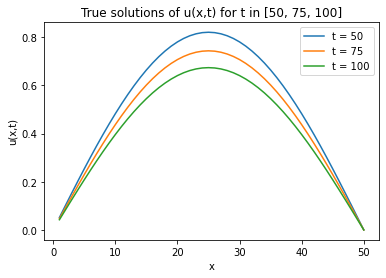

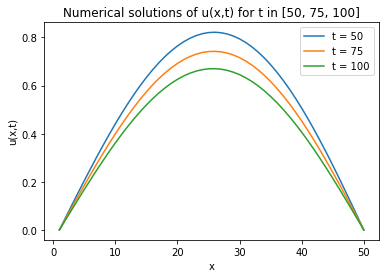

<Figure size 1080x2880 with 0 Axes>

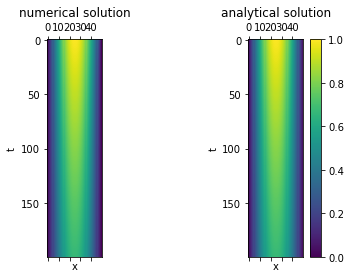

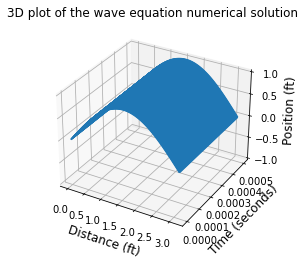

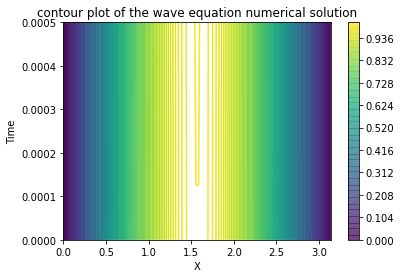

Text(0.5, 1.0, 'contour plot of the wave equation analytical solution')

<Figure size 432x288 with 0 Axes>

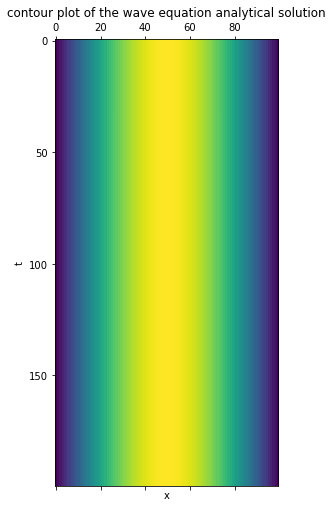

In [4]:
#from matplotlib.cbook import delete_masked_points
###1D heat equation solver


# setting L for the range of x in [0,L] and set maximum time T
L = 50
T = 100

# setting number of iterations for T
max_iter_time = 200

# setting basic parameters for numerical method
pi = np.pi
k = 1
x_iter = 50
delta_x = L/x_iter
delta_t = T/max_iter_time

a = k*delta_t/(delta_x**2)


# initializing solution: the grid of u(k, i)
# where k refers to time iterations 
# and i refers to different positions of x
u1 = np.empty((max_iter_time,  x_iter))

# setting the initial condition
for i in range(0, x_iter):
  x = i * delta_x
  u1[0, i] = np.sin(pi*x/L)

# boundary conditions: Dirichlet

u_left = 0.0
u_right = 0.0

# setting the boundary conditions
u1[:, 0] = u_left
u1[:, -1] = u_right

# using finite difference method as a function
def calculate(u):
    for k in range(0, max_iter_time-1):
        for i in range(1, x_iter-1):
            u[k + 1, i] = u[k][i] + a * (u[k][i+1] + u[k][i-1] - 2*u[k][i]) 
    return u


# doing the calculation here
u1 = calculate(u1)

# true analytical solution
def u_true(x,t):
  ans = np.exp(-k*(pi/L)**2*t) * np.sin(pi*x/L)
  return ans

t_arr = [int(T/2), int(3*T/4), T]

x_axis = np.linspace(1,50,x_iter)
plt.figure()
#plt.plot(x_axis, u_true(x_axis, 0))
for t in t_arr:
  plt.plot(x_axis, u_true(x_axis, t), label="t = {}".format(t))
plt.title("True solutions of u(x,t) for t in {}".format(t_arr))
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()

plt.figure()
for t in t_arr:
  ind = int(t*max_iter_time/T)
  plt.plot(x_axis, u1[ind-1, :], label="t = {}".format(t))
plt.title("Numerical solutions of u(x,t) for t in {}".format(t_arr))
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()

u_ht = np.empty((max_iter_time,  x_iter))
for i in range(max_iter_time):
  for j in range(x_iter):
    u_ht[i,j] = u_true(j*delta_x, i*delta_t)


f = plt.figure(figsize=(15,40))
f, (ax1, ax2) = plt.subplots(1, 2)

p1 = ax1.matshow(u1)
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_title("numerical solution")

p2 = ax2.matshow(u_ht)
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_title("analytical solution")
f.colorbar(p2)

# solving wave equation with Gekko solver
# error analysis is built-in, no need for testing

tf = .0005
npt = 200
xf = np.pi
npx = 100
time = np.linspace(0,tf,npt)
xpos = np.linspace(0,xf,npx)

m = GEKKO()
m.time = time

def phi(x):
    phi = np.sin(x)
    return phi

def psi(x):
    psi = np.sin(x)
    return psi

x0 = phi(xpos)
v0 = psi(xpos)
dx = xpos[1]-xpos[0]
#a = 18996.06
a = 1
c = 1
#c = m.Const(value = a)
dx = m.Const(value = dx)
u = [m.Var(value = x0[i]) for i in range(npx)]
v = [m.Var(value = v0[i]) for i in range(npx)]
[m.Equation(u[i].dt()==v[i]) for i in range(npx)]
m.Equation(v[0].dt()==c**2 * \
           (u[1] - 2.0*u[0] + u[npx-1])/dx**2 )
[m.Equation(v[i+1].dt()== \
            c**2 * (u[i+2] - 2.0*u[i+1] + u[i])/dx**2) \
            for i in range(npx-2) ]
m.Equation(v[npx-1].dt()== c**2 * \
           (u[npx-2] - 2.0*u[npx-1] + u[0])/dx**2 )
m.options.imode = 4
m.options.solver = 1
m.options.nodes = 3

m.solve()

# re-arrange results for plotting
for i in range(npx):
    if i ==0:
        ustor = np.array([u[i]])
        tstor = np.array([m.time])
    else:
        ustor = np.vstack([ustor,u[i]])
        tstor = np.vstack([tstor,m.time])
for i in range(npt):
    if i == 0:
        xstor = xpos
    else:
        xstor = np.vstack([xstor,xpos])
xstor = xstor.T
t = tstor
ustor = np.array(ustor)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.set_xlabel('Distance (ft)', fontsize = 12)
ax.set_ylabel('Time (seconds)', fontsize = 12)
ax.set_zlabel('Position (ft)', fontsize = 12)
ax.set_zlim((-1,1))
p = ax.plot_wireframe(xstor,tstor,ustor,\
                      rstride=1,cstride=1)
ax.set_title("3D plot of the wave equation numerical solution")

plt.figure()
plt.contour(xstor, tstor, ustor, 150)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Time')
plt.title("contour plot of the wave equation numerical solution")
plt.show()


# true analytical solution of wave equation
def u_wave(x,t):
  ans = np.cos(t)*np.sin(x) + np.sin(t)*np.sin(x)
  return ans

u_wv = np.empty((npt,npx))
for i in range(npt):
  for j in range(npx):
    u_wv[i,j] = u_wave(xpos[j], time[i])

# plotting true solutions
plt.figure()
plt.matshow(u_wv)
#plt.colorbar('horizontal')
plt.xlabel('x')
plt.ylabel('t')
plt.title("contour plot of the wave equation analytical solution")




In [5]:
# Testing Cell for verifying numerical solutions of the heat equation
x_axis = np.linspace(1,50,x_iter)
t_arr = [int(T/2), int(3*T/4), T]

diff_arr = np.zeros((len(t_arr), x_iter))
true_arr = np.zeros((len(t_arr), x_iter))
num_arr = np.zeros((len(t_arr), x_iter))

for i in range(len(t_arr)):
  t = t_arr[i]
  ind = int(t*max_iter_time/T)
  diff = u_true(x_axis, t) - u1[ind-1,:]
  diff_arr[i] = diff
  true_arr[i] = u_true(x_axis,t)
  num_arr[i] = u1[ind-1,:]

for i in range(len(t_arr)):
  rel_err = np.linalg.norm(diff_arr[i]) / np.linalg.norm(true_arr[i])
  np.testing.assert_allclose(true_arr[i],num_arr[i],rtol = 1,atol = 1)
  print("at t = {}, relative error is {}".format(t_arr[i], rel_err))

at t = 50, relative error is 0.04838847205611153
at t = 75, relative error is 0.046422300942233624
at t = 100, relative error is 0.045623120065313535


## Discussion 

Conclusions: <br>
It is certain that our numerical results are correct. 
The project worked because we have achieved low relative error tolerance at the end of the timespan.
However, there are a few remarks. <br>
First, our method is not very stable in general. The errors are especially large if our time interval is small.  <br>
Second, the only value that $\Delta x$ can take for our algorithm to function is 1. We produce no valuable results if we choose a different value other than 1. <br>
Third, for our method to work, the maximum number of iterations must be large enough such that $\Delta t$ is less than 1 and the solution does not oscillate. <br>
Overall, our method has produced a similar-looking contour plot via the matshow() command for both the numerical solution and analytical solution matrices. For the wave equation using the Gekko package, there is not much to elaborate on since the solver is very robust and the variables can be changed almost arbitrarily without causing issues. It can be argued that the Gekko solver is as powerful as the solve_ivp function introduced in class for ODE's.<br>
The next step is to resolve the stability issue so that for smaller time intervals, $\Delta x$, and the maximum number of iterations, the relative errors still converge. Also, we want to solve the 2-dimensional heat equation while guaranteeing the same stability for our choice of time interval, $\Delta x$, and the maximum number of iterations. 



## Reference

Haberman, Richard. “Applied Partial Differential Equations with Fourier Series and Boundary Value Problems.” (2012). 

Abdelwahed, Mohamed et al. “NUMERICAL SOLUTIONS TO HEAT EQUATIONS VIA THE SPECTRAL METHOD.” (2016).

Pieper, Martin and Peter Klein. “Numerical solution of the heat equation with non‐linear, time derivative‐dependent source term.” International Journal for Numerical Methods in Engineering 84 (2010): 1205-1221.

Li, Jing-Rebecca and Leslie Greengard. “On the numerical solution of the heat equation I: Fast solvers in free space.” J. Comput. Phys. 226 (2007): 1891-1901.

Tatari, Mehdi et al. “Numerical solution of the one‐dimensional heat equation on the bounded intervals using fundamental solutions.” Numerical Methods for Partial Differential Equations 24 (2008): 911-923.

Yang, Xiangfeng. “Solving uncertain heat equation via numerical method.” Appl. Math. Comput. 329 (2018): 92-104.

Saadatmandi, Abbas and Mehdi Dehghan. “Numerical solution of the one‐dimensional wave equation with an integral condition.” Numerical Methods for Partial Differential Equations 23 (2007): 282-292.

Necasová, Gabriela et al. “Numerical solution of wave equation using higher order methods.” (2018).

Temirgaliev, N. et al. “Discretization of solutions to a wave equation, numerical differentiation, and function recovery with the help of computer (computing) diameter.” Russian Mathematics 57 (2013): 75-80.